<a href="https://colab.research.google.com/github/ersjunior/3DTS-DataProcessingWithPython/blob/main/3DTS_Processamento_de_dados_com_Python_A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotécas necessárias

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Iniciando Aula 9

* Acessando a base de dados

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/peso_altura%20-%20all.csv')

dados.head()

,SEXO,ALTURA,PESO
0,0,187.571423,109.951620
1,0,174.706036,73.777488
2,0,188.239668,96.700389
3,0,182.196685,100.019305
4,0,177.499762,93.795364


* Criando as variáveis de treino

In [6]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
    dados[['ALTURA',  'PESO']],
    dados['SEXO'],
    test_size=0.2
)

X_treino.head()

,ALTURA,PESO
294,163.639992,76.867910
1084,178.109362,86.036147
4974,173.633919,79.181041
6713,160.402894,63.945625
1701,189.662904,94.503664


* Treinando a base de dados (fit)

In [10]:
arv=DecisionTreeClassifier()
arv.fit(X_treino, y_treino)
acc_treino = arv.score(X_treino, y_treino)
acc_treino * 100

100.0

## Visualizando a análise em uma arvore de decisao

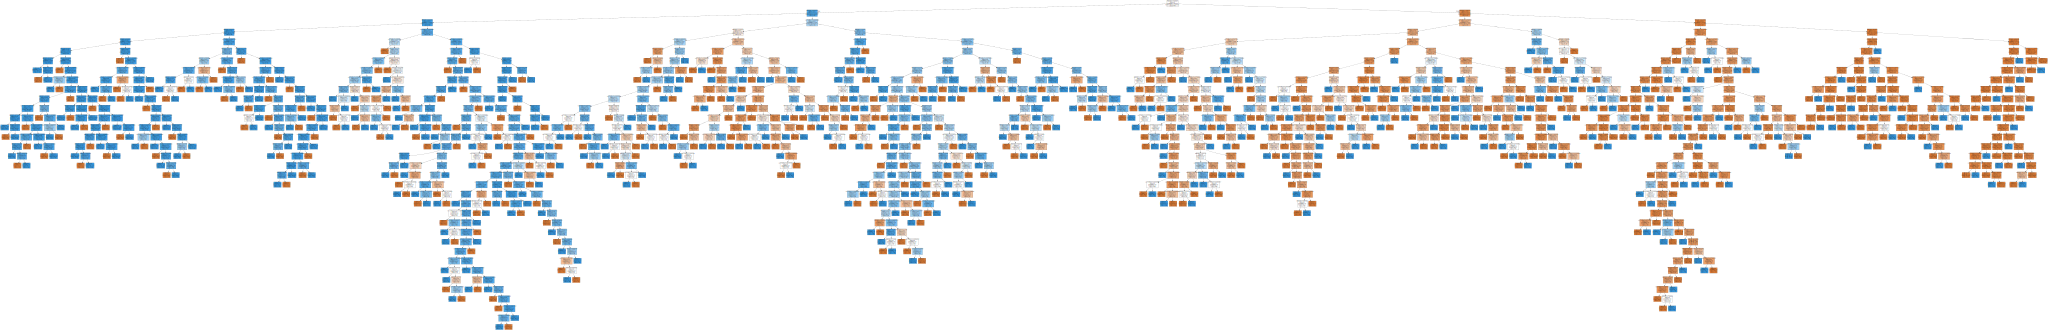

In [17]:
from sklearn.tree import export_graphviz
from graphviz import Source

graf = export_graphviz(
    arv,
    filled=True,
    feature_names=['ALTURA', 'PESO'],
    class_names=['H', 'M'],
    # graph_attr={'size': '10,10'}  # Defina o tamanho do gráfico aqui
)
Source(graf)

# Conhecendo o H2O

In [18]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697886 sha256=9af50972322eda6645d08602228f0e15d0b7710d1d1c6d86a9994eea923441ed
  Stored in directory: /root/.cache/pip/wheels/43/f2/b0/5bb4d702a0467e82d77c45088db3eef25114c26b0eec8e7f6a
Successfully built h2o


In [19]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpaw7srz2i
  JVM stdout: /tmp/tmpaw7srz2i/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpaw7srz2i/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_j22dlf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [29]:
from h2o.estimators import H2ORandomForestEstimator

dados = h2o.import_file('https://raw.githubusercontent.com/lcbjrrr/quant/master/peso_altura%20-%20all.csv')
dados['SEXO'] = dados['SEXO'].asfactor()
treino, teste = dados.split_frame(ratios=[0.80])
treino.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


SEXO,ALTURA,PESO
0,187.571,109.952
0,174.706,73.7775
0,177.5,93.7954
0,174.714,83.6036
0,173.605,76.3505
0,170.228,79.9679
0,161.179,71.0908
0,180.836,84.8204
0,181.968,97.1551
0,164.506,75.967


## Criando o primeiro treino comum

In [32]:
tree = H2ORandomForestEstimator(max_depth=3)
tree.train(['ALTURA', 'PESO'], 'SEXO', treino)
tree.model_performance(teste)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.0678258993817593
RMSE: 0.2604340595654864
LogLoss: 0.24353400771293393
Mean Per-Class Error: 0.0806202647494504
AUC: 0.9614872578712483
AUCPR: 0.959402695881649
Gini: 0.9229745157424967

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5545188899338245
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      949   80    0.0777   (80.0/1029.0)
1      86    944   0.0835   (86.0/1030.0)
Total  1035  1024  0.0806   (166.0/2059.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.554519     0.919182  182
max f2                       0.257735     0.934535  261
max f0point5                 0.665444     0.925926  144
max accuracy                 0.554519     0.919378  182
max precision                0.973047     1         0
max recall                   0.0160864    1         399
max specificity              0.973047     1         0
max absolute_mcc             0.554519     0.838771  182
max min_per_class_accuracy   0.548318     0.917476  184
max mean_per_class_accuracy  0.554519     0.91938   182
max tns                      0.973047     1029      0
max fns                      0.973047     948       0
max fps                      0.0160864    1029      399
max tps                      0.0160864    1030      399
max tnr                      0.973047     1         0
max fnr                      0.973047     0.920388  0
max fpr                      0.0160864    1         399
max tpr                      0.0160864    1         399

Gains/Lift Table: Avg response rate: 50.02 %, avg score: 49.74 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0398252                   0.973047           1.99903    1.99903            1                0.973047   1                           0.973047            0.0796117       0.0796117                  99.9029   99.9029            0.0796117
2        0.051967                    0.969484           1.99903    1.99903            1                0.969484   1                           0.972215            0.0242718       0.103883                   99.9029   99.9029            0.103883
3        0.100534                    0.967012           1.93906    1.97006            0.97             0.967569   0.985507                    0.96997             0.0941748       0.198058                   93.9058   97.0058            0.195143
4        0.150073                    0.952989           1.94023    1.96021            0.970588         0.95967    0.980583                    0.96657             0.0961165       0.294175                   94.0234   96.0213            0.288344
5        0.21661                     0.946244           1.96985    1.96317            0.985401         0.949735   0.982063                    0.961399            0.131068        0.425243                   96.9846   96.3172            0.417468
6        0.300146                    0.930144           1.90605    1.94727            0.953488         0.93864    0.97411                     0.955065            0.159223        0.584466                   90.6051   94.7274            0.568917
7        0.400194                    0.842593           1.77584    1.90441            0.88835          0.903085   0.95267                     0.94207             0.17767         0.762136                   77.5837   90.4415            0.724235
8        0.500243       

## Fazendo um novo treino usando cross

In [33]:
tree = H2ORandomForestEstimator(nfolds=5)
tree.train(['ALTURA', 'PESO'], 'SEXO', dados)
tree.model_performance()

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.07466976840305392
RMSE: 0.27325769596308525
LogLoss: 0.7220334759795225
Mean Per-Class Error: 0.0975
AUC: 0.9570141799999999
AUCPR: 0.9512831869116364
Gini: 0.9140283599999999

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41666667328940504
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      4407  593   0.1186   (593.0/5000.0)
1      382   4618  0.0764   (382.0/5000.0)
Total  4789  5211  0.0975   (975.0/10000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.416667     0.904515  235
max f2                       0.130325     0.928179  342
max f0point5                 0.736842     0.916027  122
max accuracy                 0.493189     0.9029    208
max precision                0.997783     0.975739  2
max recall                   0            1         399
max specificity              1            0.9854    0
max absolute_mcc             0.489723     0.805849  209
max min_per_class_accuracy   0.510321     0.9012    205
max mean_per_class_accuracy  0.493189     0.9029    208
max tns                      1            4927      0
max fns                      1            2092      0
max fps                      0            5000      399
max tps                      0            5000      399
max tnr                      1            0.9854    0
max fnr                      1            0.4184    0
max fpr                      0            1         399
max tpr                      0            1         399

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 50.03 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.298                       1                  1.95168    1.95168            0.975839         1          0.975839                    1                   0.5816          0.5816                     95.1678   95.1678            0.5672
2        0.3001                      0.999145           1.90476    1.95135            0.952381         0.999265   0.975675                    0.999995            0.004           0.5856                     90.4762   95.135             0.571
3        0.4023                      0.857143           1.78278    1.90853            0.891389         0.929702   0.954263                    0.982138            0.1822          0.7678                     78.2779   90.8526            0.731
4        0.5051                      0.5                1.36187    1.79727            0.680934         0.694334   0.898634                    0.923563            0.14            0.9078                     36.1868   79.7268            0.8054
5        0.6004                      0.142857           0.596013   1.6066             0.298006         0.292752   0.803298                    0.823436            0.0568          0.9646                     -40.3987  60.6596            0.7284
6        1                           0                  0.0885886  1                  0.0442943        0.0148749  0.5                         0.500335            0.0354          1                          -91.1411  0                  0

## Fazendo o treino com um grid de busca

In [37]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator

dados = h2o.import_file('https://raw.githubusercontent.com/lcbjrrr/quant/master/peso_altura%20-%20all.csv')
dados['SEXO'] = dados['SEXO'].asfactor()
params = {'max_depth': [2, 3, 4]}

grid = H2OGridSearch(model=H2ORandomForestEstimator, hyper_params=params)
grid.train(['ALTURA', 'PESO'], 'SEXO', dados, nfolds=5)
print(grid.get_grid(sort_by='accuracy', decreasing=True))
grid.models[0].model_performance()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by decreasing accuracy
    max_depth    model_ids                                                        accuracy
--  -----------  ---------------------------------------------------------------  ----------
    4            Grid_DRF_py_27_sid_9b42_model_python_1687905983836_3255_model_3  0.9175
    3            Grid_DRF_py_27_sid_9b42_model_python_1687905983836_3255_model_2  0.9123
    2            Grid_DRF_py_27_sid_9b42_model_python_1687905983836_3255_model_1  0.9074


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.06601386262449765
RMSE: 0.2569316302530649
LogLoss: 0.23042720176402937
Mean Per-Class Error: 0.0841
AUC: 0.9667872999999999
AUCPR: 0.9632842832565788
Gini: 0.9335745999999998

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4926538415606882
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      4543  457   0.0914   (457.0/5000.0)
1      384   4616  0.0768   (384.0/5000.0)
Total  4927  5073  0.0841   (841.0/10000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.492654     0.916509  208
max f2                       0.270918     0.935658  268
max f0point5                 0.774398     0.924021  124
max accuracy                 0.590745     0.9166    185
max precision                0.991742     1         0
max recall                   0.00718856   1         395
max specificity              0.991742     1         0
max absolute_mcc             0.590745     0.833367  185
max min_per_class_accuracy   0.536009     0.9152    198
max mean_per_class_accuracy  0.590745     0.9166    185
max tns                      0.991742     5000      0
max fns                      0.991742     4992      0
max fps                      0.00423747   5000      399
max tps                      0.00718856   5000      395
max tnr                      0.991742     1         0
max fnr                      0.991742     0.9984    0
max fpr                      0.00423747   1         399
max tpr                      0.00718856   1         395

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 50.03 %
group    cumulative_data_fraction    lower_threshold    lift    cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain    cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  ------  -----------------  --------------------
1        0.01                        0.988425           1.98    1.98               0.99             0.989515   0.99                        0.989515            0.0198          0.0198                     98      98                 0.0196
2        0.02                        0.987249           1.96    1.97               0.98             0.987888   0.985                       0.988701            0.0196          0.0394                     96      97                 0.0388
3        0.03                        0.985955           2       1.98               1                0.986669   0.99                        0.988024            0.02            0.0594                     100     98                 0.0588
4        0.04                        0.983875           1.98    1.98               0.99             0.984973   0.99                        0.987261            0.0198          0.0792                     98      98                 0.0784
5        0.05                        0.981757           1.98    1.98               0.99             0.982832   0.99                        0.986375            0.0198          0.099                      98      98                 0.098
6        0.1                         0.973247           1.968   1.974              0.984            0.976951   0.987                       0.981663            0.0984          0.1974                     96.8    97.4               0.1948
7        0.15                        0.967351           1.96    1.96933            0.98             0.970417   0.984667                    0.977915            0.098           0.2954                     96      96.9333            0.2908
8        0.2                         0.96046            1.972   1.97               0.986  

## Treinando com AutoML

In [38]:
from h2o.automl import H2OAutoML

dados = h2o.import_file('https://raw.githubusercontent.com/lcbjrrr/quant/master/peso_altura%20-%20all.csv')
dados['SEXO'] = dados['SEXO'].asfactor()
aml = H2OAutoML(max_models=6,nfolds=5)
aml.train(['ALTURA',  'PESO'],'SEXO',dados)
print(aml.leaderboard.head(10))
aml.get_best_model().model_performance()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
GLM_1_AutoML_1_20230627_232214                           0.973128   0.209518  0.972897                  0.0803  0.249807  0.0624034
StackedEnsemble_AllModels_1_AutoML_1_20230627_232214     0.973116   0.209635  0.973046                  0.0805  0.249886  0.0624429
StackedEnsemble_BestOfFamily_1_AutoML_1_20230627_232214  0.973041   0.209929  0.972981                  0.0806  0.250089  0.0625443
XGBoost_1_AutoML_1_20230627_232214                       0.968659   0.226579  0.96764                   0.0913  0.259946  0.0675719
GBM_1_AutoML_1_20230627_232214                           0.968123   0.22946   0.965627                  0.0896  0.258853  0.067005
XGBoost_2_AutoML_1_

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.062306396515117816
RMSE: 0.2496124927064305
LogLoss: 0.20914173105712672
AUC: 0.9731948200000001
AUCPR: 0.9729270298359748
Gini: 0.9463896400000003
Null degrees of freedom: 9999
Residual degrees of freedom: 9997
Null deviance: 13862.943611198476
Residual deviance: 4182.834621142533
AIC: 4188.834621142533

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4779541512012287
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      4577  423   0.0846   (423.0/5000.0)
1      384   4616  0.0768   (384.0/5000.0)
Total  4961  5039  0.0807   (807.0/10000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.477954     0.919614  203
max f2                       0.202295     0.938539  291
max f0point5                 0.666885     0.929515  148
max accuracy                 0.50561      0.9196    197
max precision                0.999787     1         0
max recall                   0.00188168   1         396
max specificity              0.999787     1         0
max absolute_mcc             0.50561      0.839204  197
max min_per_class_accuracy   0.496887     0.9188    199
max mean_per_class_accuracy  0.50561      0.9196    197
max tns                      0.999787     5000      0
max fns                      0.999787     4617      0
max fps                      0.000235013  5000      399
max tps                      0.00188168   5000      396
max tnr                      0.999787     1         0
max fnr                      0.999787     0.9234    0
max fpr                      0.000235013  1         399
max tpr                      0.00188168   1         396

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 50.00 %
group    cumulative_data_fraction    lower_threshold    lift    cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain    cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  ------  -----------------  --------------------
1        0.01                        0.999904           2       2                  1                0.999949     1                           0.999949            0.02            0.02                       100     100                0.02
2        0.02                        0.999803           2       2                  1                0.999855     1                           0.999902            0.02            0.04                       100     100                0.04
3        0.03                        0.99964            2       2                  1                0.999732     1                           0.999846            0.02            0.06                       100     100                0.06
4        0.04                        0.999475           2       2                  1                0.999568     1                           0.999776            0.02            0.08                       100     100                0.08
5        0.05                        0.999272           2       2                  1                0.999368     1                           0.999694            0.02            0.1                        100     100                0.1
6        0.1                         0.997661           1.992   1.996              0.996            0.998554     0.998                       0.999124            0.0996          0.1996                     99.2    99.6               0.1992
7        0.15                        0.994349           1.992   1.99467            0.996            0.996196     0.997333                    0.998148            0.0996          0.2992    

## DTSR3 - Atividade 9

* Utilizando uma base de dados do Kaggle, realize uma Classificação com a Reg Logística ou Árvore de Decisão (caso na atividade anterior tenha já utilizado RegLog, utilize nesta Árvore).

* Não esqueça de separar treino e teste, bem como de calcular as devidas métricas. Em seguida, realize um processo de AutoML com H2O, e aí as métricas melhoraram?